### Image Gradient

Image gradients are a fundamental concept in image processing and computer vision. They represent the directional change in the intensity or color of an image. Gradients are useful for detecting edges, analyzing texture, and extracting features from images.

<img src="./Notes_Images/Gd1.png">

#### Gradient Calculation Techniques

<img src="./Notes_Images/Gd2.png">

Gradient are calculated by creating a matrix that exactly represents the derivative. As we need to calculate derivative to find the rate of change between the pixels. Instead of using loops we create a matrix that exactly represents the derivative needed to calculate the change. 

**Using Convolution Matrix**

<img src="./Notes_Images/Gd3.png">

**Gradient Calculation Using Prewitt Kernels**

<img src="./Notes_Images/Gd4.png">

<img src="./Notes_Images/Gd5.png">

<img src="./Notes_Images/Gd6.png">

<img src="./Notes_Images/Gd12.png">

<img src="./Notes_Images/Gd7.png">

After calculating the gradient we can use the gradient value and direction to detect corner or edges. 

#### How to use Kernels?(When to use which kernel)

**Prewitt** : Normal, but less effective at reducing noise.

**Sobel** : Basic smoothing effect, making it more robust to noise than Prewitt.

**Scharr** : `Scharr` is specifically optimized for higher accuracy in edge detection and is less sensitive to diagonal distortions. Best so far best for high precision.

#### Types of High Pass Filter (Gradient Filters)

**Sobel and Scharr Derivatives** : It used `Sobel and Scharr` kernel. 

**Laplacian Derivatives** : The Laplacian derivative is an edge detection operator that works differently compared to `Sobel` and `Scharr`. Instead of focusing on gradient computation in specific directions , the Laplacian detects edges by calculating the `second derivative` of the image intensity. This approach captures regions where the intensity changes abruptly in all directions, making it a rotation-invariant method.

<img src="./Notes_Images/Gd8.png">

<img src="./Notes_Images/Gd9.png">

#### Difference between Laplacian, Sobel and Scharr 

<img src="./Notes_Images/Gd10.png">

#### Final Summary 

<img src="./Notes_Images/Gd11.png">

We should always pass Grey Scaled image for finding the Gradient of Pixel


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

cv.setUseOptimized(True)

(<Axes: title={'center': 'blur'}>,
 Text(0.5, 1.0, 'blur'),
 (np.float64(-0.5), np.float64(895.5), np.float64(1023.5), np.float64(-0.5)))

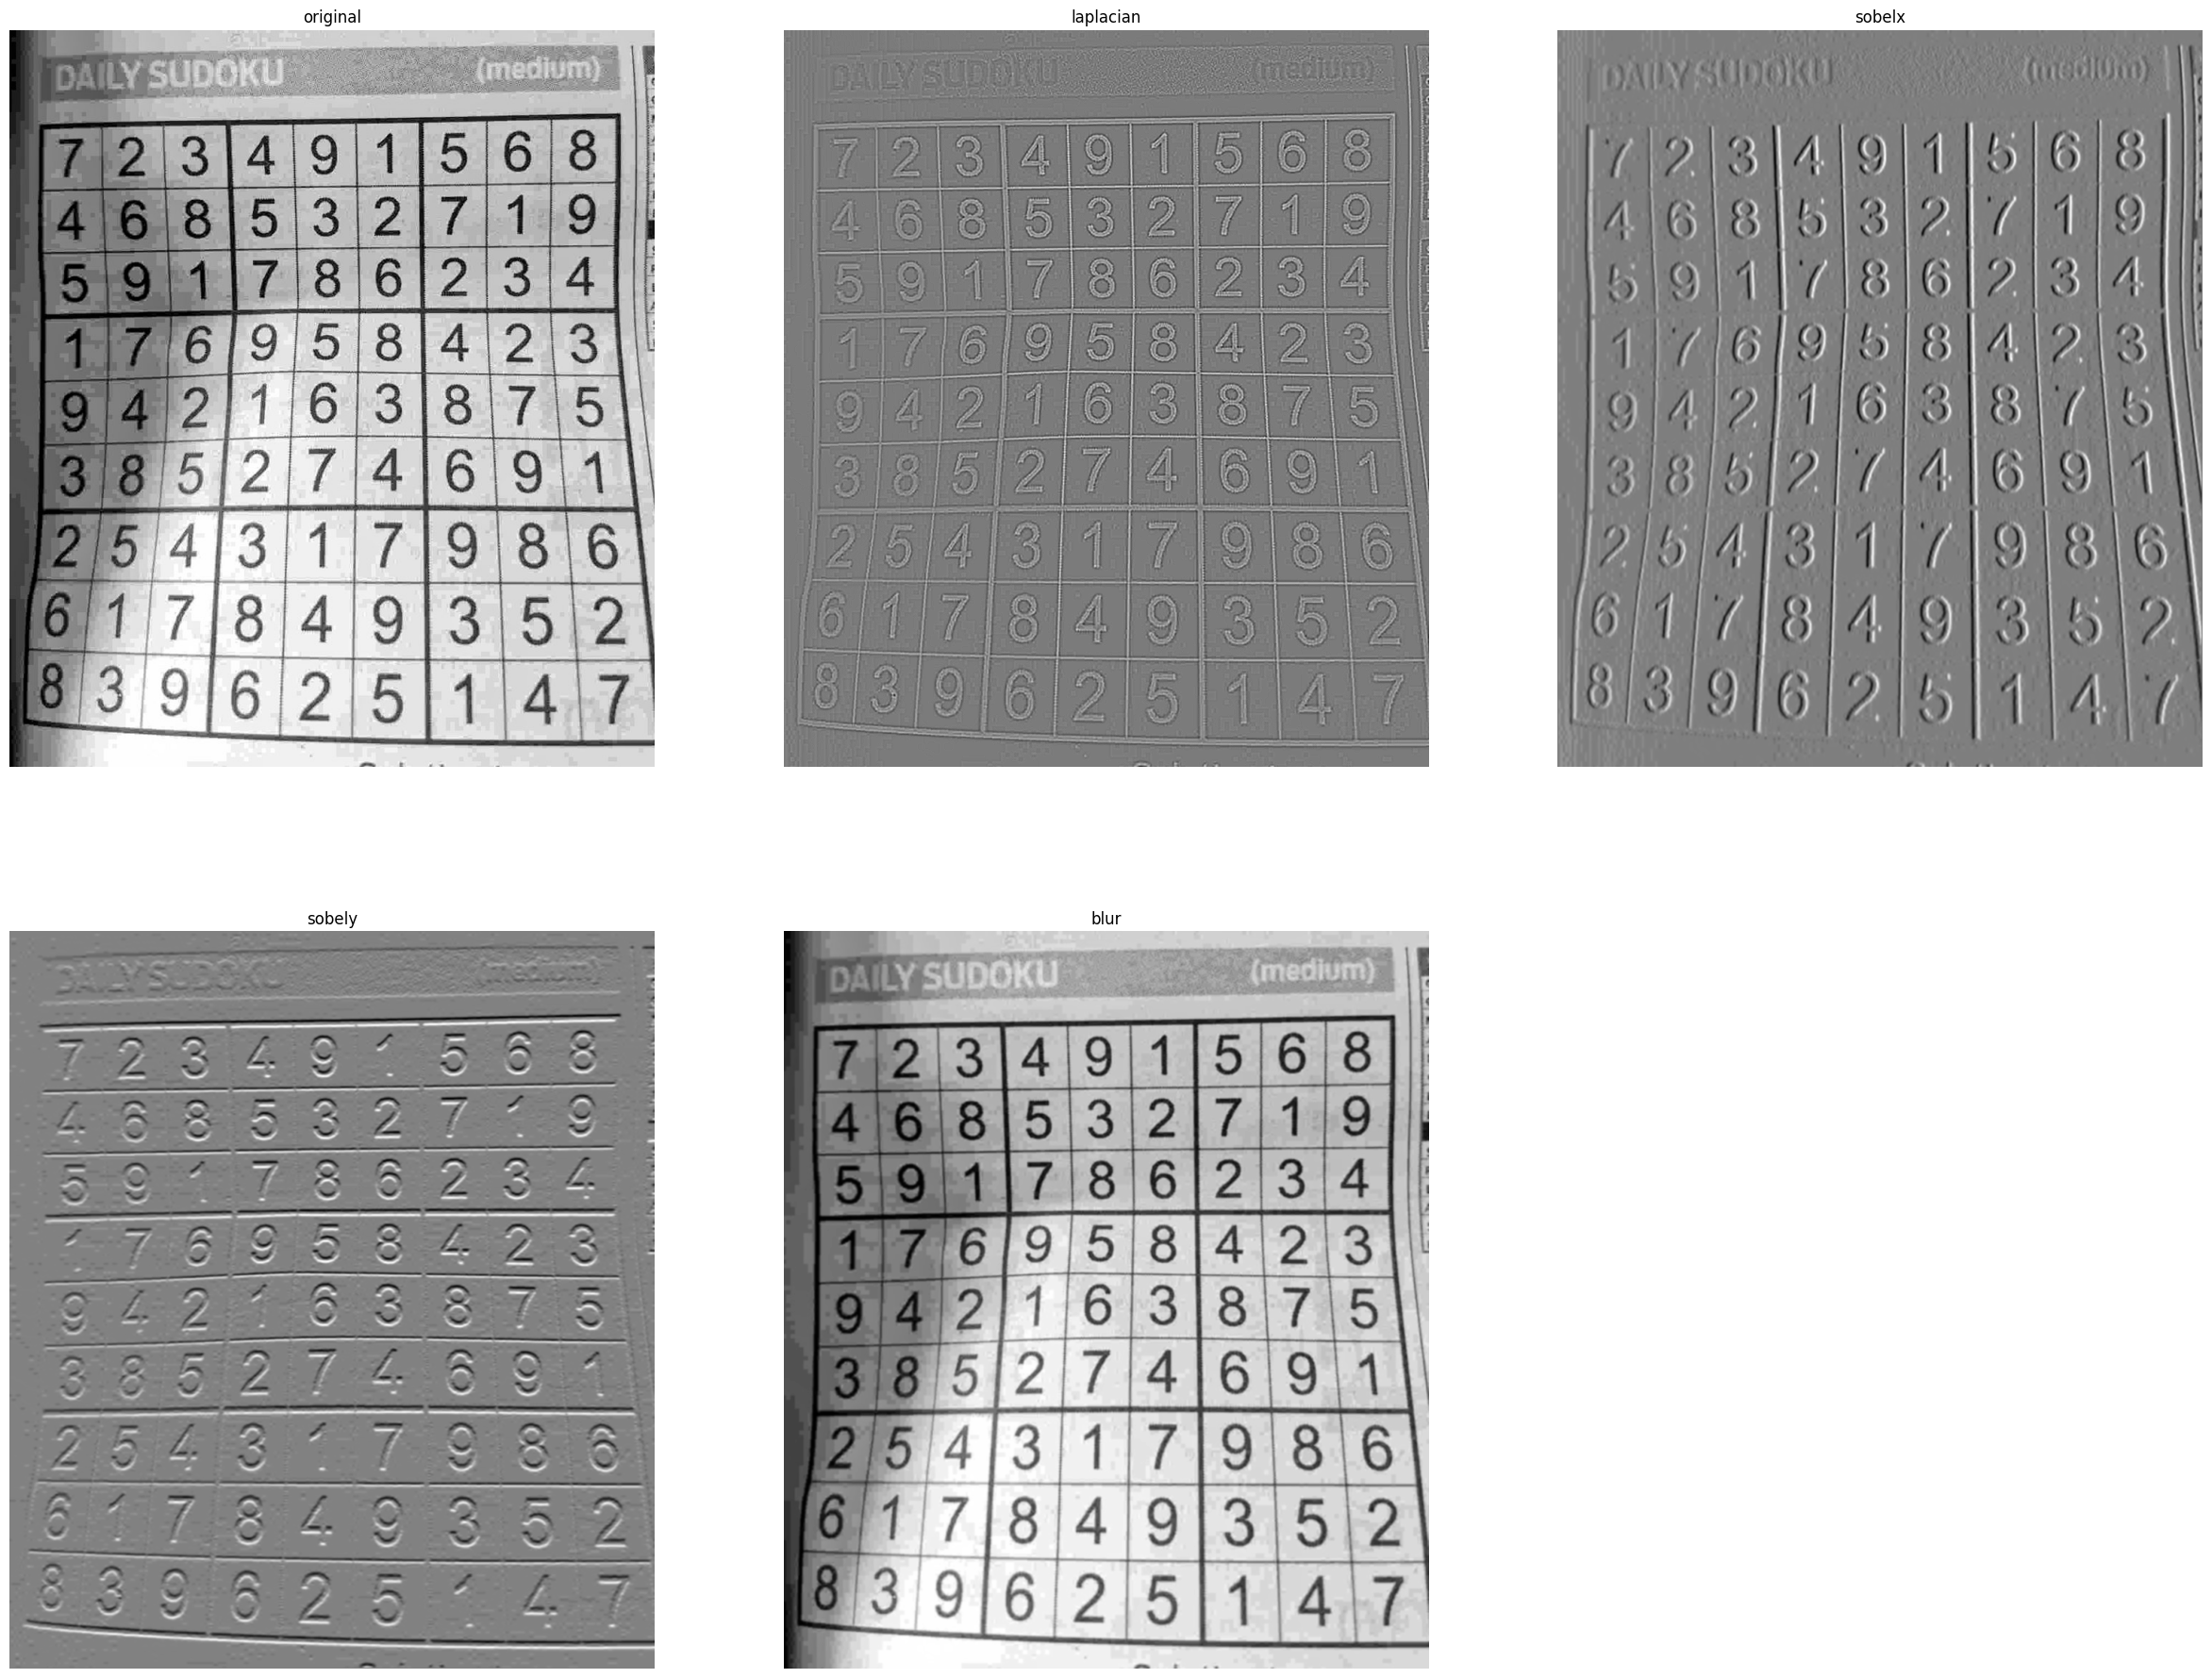

In [4]:
# Image gradient

img = cv.imread("./sudoku_grad.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

after_blur = cv.GaussianBlur(img,(5,5),1)

laplacian = cv.Laplacian(after_blur,cv.CV_64F)
sobelx = cv.Sobel(after_blur,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(after_blur,cv.CV_64F,0,1,ksize=5)

plt.figure(figsize=(30,60))

plt.subplot(531), plt.title("original"), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(532), plt.title("laplacian"), plt.imshow(laplacian, cmap='gray'), plt.axis('off')
plt.subplot(533), plt.title("sobelx"), plt.imshow(sobelx, cmap='gray'), plt.axis('off')
plt.subplot(534), plt.title("sobely"), plt.imshow(sobely, cmap='gray'), plt.axis('off')
plt.subplot(535), plt.title("blur"), plt.imshow(after_blur, cmap='gray'), plt.axis('off')

### Canny Edge Detection

We've studied about `Image Gradient` to identify areas of significant intensity changes. 

#### Steps for Canny 

1. **Noise Reduction** : Gussian Blur, 5*5 filter
2. Compute Image Gradient using `Sobel` kernel in both Horizontal and Vertical direction. Here, we get the direction and magnitude for each pixel.
3. **Non-maximum Suppression (Thinning the Edge)** : After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Basically to make the edge thinner and to include only the high intensity pixels for the edge we take local maximum. 

<img src="./Notes_Images/Canny1.png">

**Finding Local Maximum**

<img src="./Notes_Images/Canny2.png">

<img src="./Notes_Images/Canny3.png">

Finally we've only edges which contributes the most for probable edges in the image. 

Now, we've got thinned the probable edges. But still we are not sure if they are edges. We use `Hysteresis Thresholding` to confirm if the intensities are actually edge. We need to pass `minVal` and `maxVal`. Any `thin` intensities above `maxVal` are sure-edge and below `minVal` are not considered edge, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

<img src="./Notes_Images/Canyy4.jpg">

The edge `A` is above the `maxVal`, so considered as "sure-edge". Although edge `C` is below `maxVal`, it is connected to edge `A`, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge `C`, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and `maxVal` accordingly to get the correct result.

(<Axes: title={'center': 'canny'}>,
 Text(0.5, 1.0, 'canny'),
 (np.float64(-0.5), np.float64(486.5), np.float64(599.5), np.float64(-0.5)))

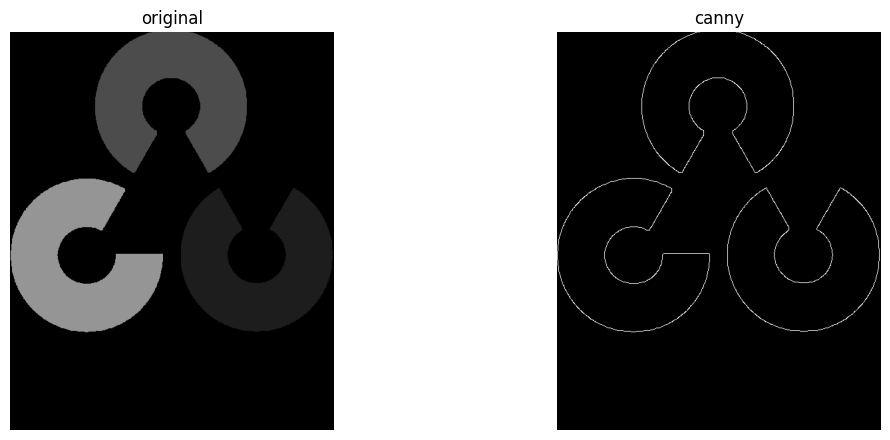

In [18]:
# Canny Edge Detection

canny_test_img = cv.imread('cv_logo.png', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(canny_test_img,10,20)

plt.figure(figsize=(20,30))

plt.subplot(531), plt.title("original"), plt.imshow(cv.cvtColor(canny_test_img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(532), plt.title("canny"), plt.imshow(edges, cmap='gray'), plt.axis('off')